# <span style="color: blue">Exploratory Data Analysis Boston Housing Dataset</span>

## Predicting Housing Prices from Dataset

#### This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.
#### We will adopt some basic exploratory data analysis by utilizing some statistical tools.

In [1]:
# inlining the matplotlib, so we can plot the graph on the fly
%matplotlib inline

# importing the required libraries
import numpy as np
import sklearn
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(linewidth=360)

def RemoveTR_Axis():
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [2]:
# set seaborn style to our code e.g. 'whitegrid', 'darkgrid', 'white', 'dark', 'ticks'
sns.set_style('white')

# set plotting context parameter e.g. 'Poster', 'Talk', 'Paper'
sns.set_context('paper')

## 1. Loading Boston Housing Dataset

In [3]:
# import load_boston from sklearn dataset
from sklearn.datasets import load_boston

boston = load_boston()

# check the keys this dataset have
print (boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# check for shape of dataset
print (boston.data.shape)

(506, 13)


## 2. Describing the Dataset

In [5]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# show the available features (columns)
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


## 3. Preparing dataset for regression

#### a. convert boston dataset to pandas dataframe for further analysis

In [7]:
boston_df = pd.DataFrame(boston.data)

In [8]:
# show head dataframe
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# as features (columns) integer value didn't describe well, we can change this to feature name
boston_df.columns = boston.feature_names

# show head dataframe with feature names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


###### Adding 'Price'  as another feature in the current dataset which is a part of an attribute called "target"

In [10]:
boston_df['PRICE'] = boston.target

# show head dataframe with feature names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


###### b. Summary Statistics

In [11]:
# showing summary of each feature(s) using describe
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 4. Analysis

### a. Building a Resgression Model

#### Step I: Check for linearity with Scatter Plot

we'll see the relationship between "PRICE" and other variables, because in order to create good linear model the features should have a linear relationship with prices.

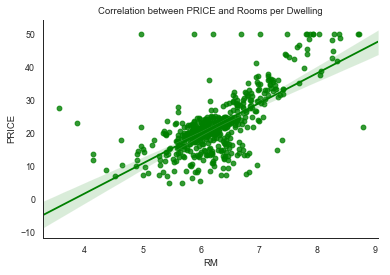

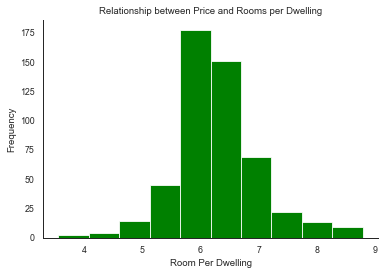

In [12]:
# Relationship between Rooms per Dwelling and PRICE
sns.regplot(x= 'RM', y= 'PRICE', data= boston_df, fit_reg= True, color= 'g')
plt.title('Correlation between PRICE and Rooms per Dwelling')
sns.despine()
plt.show()

RemoveTR_Axis()
plt.hist(boston_df.RM, color= 'g')
plt.xlabel('Room Per Dwelling')
plt.ylabel('Frequency')
plt.title('Relationship between Price and Rooms per Dwelling')
plt.show()

#### <span style="color: green">As we can see a strong poistive correlation between 'Rooms per Dwelling' and 'Price'. Number of Rooms will vary with change in Price.</span>

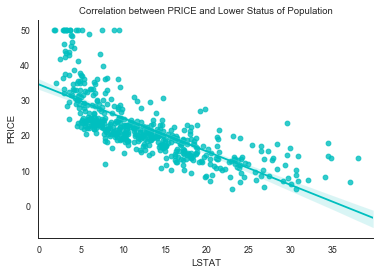

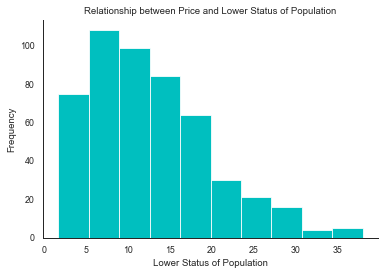

In [13]:
# Relationship between Lower Status of Population and PRICE
sns.regplot(x= 'LSTAT', y= 'PRICE', data= boston_df, fit_reg= True, color= 'c')
plt.title('Correlation between PRICE and Lower Status of Population')
sns.despine()
plt.show()

RemoveTR_Axis()
plt.hist(boston_df.LSTAT, color= 'c')
plt.xlabel('Lower Status of Population')
plt.ylabel('Frequency')
plt.title('Relationship between Price and Lower Status of Population')
plt.show()

#### <span style="color: MediumTurquoise">As we can see a strong negative correlation between 'Lower Status of Population' and 'Price'. as Status of Population vary with change in Price.</span>

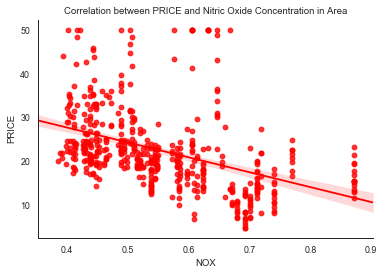

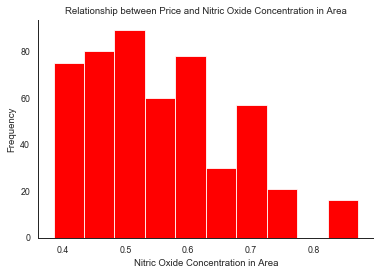

In [14]:
# Relationship between Nitric Oxide Concentration in Area and PRICE
sns.regplot(x= 'NOX', y= 'PRICE', data= boston_df, fit_reg= True, color= 'r')
plt.title('Correlation between PRICE and Nitric Oxide Concentration in Area')
sns.despine()
plt.show()

RemoveTR_Axis()
plt.hist(boston_df.NOX, color= 'r')
plt.xlabel('Nitric Oxide Concentration in Area')
plt.ylabel('Frequency')
plt.title('Relationship between Price and Nitric Oxide Concentration in Area')
plt.show()

#### <span style="color: red">As we can see a strong negative correlation between 'Nitric Oxide Concentration in Area' and 'Price'. as NOX vary with change in Price.</span>

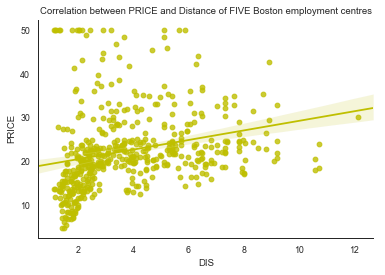

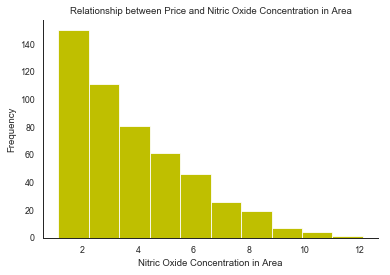

In [15]:
# Relationship between Distance of FIVE Boston employment centres and PRICE
sns.regplot(x= 'DIS', y= 'PRICE', data= boston_df, fit_reg= True, color= 'y')
plt.title('Correlation between PRICE and Distance of FIVE Boston employment centres')
sns.despine()
plt.show()

RemoveTR_Axis()
plt.hist(boston_df.DIS, color= 'y')
plt.xlabel('Nitric Oxide Concentration in Area')
plt.ylabel('Frequency')
plt.title('Relationship between Price and Nitric Oxide Concentration in Area')
plt.show()

#### <span style="color: olive">As we can see a strong positive correlation between 'Distance between FIVE Boston Employment Centres' and 'Price'. as Distance vary with change in Price.</span>

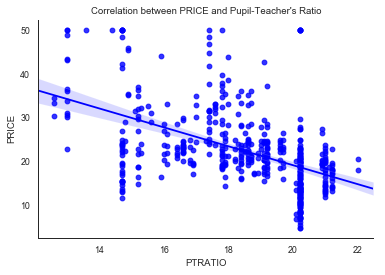

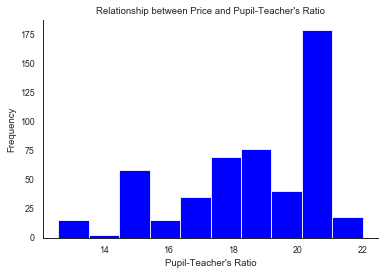

In [16]:
# Relationship between Pupil-Teacher ratio and PRICE
sns.regplot(x= 'PTRATIO', y= 'PRICE', data= boston_df, fit_reg= True, color= 'b')
plt.title('Correlation between PRICE and Pupil-Teacher\'s Ratio' )
sns.despine()
plt.show()

RemoveTR_Axis()
plt.hist(boston_df.PTRATIO, color= 'b')
plt.xlabel('Pupil-Teacher\'s Ratio')
plt.ylabel('Frequency')
plt.title('Relationship between Price and Pupil-Teacher\'s Ratio')
plt.show()

#### <span style="color: blue">As we can see a strong negative correlation between "Pupil-Teacher's Ratio" and "Price". as Ratio increase the price decrease.</span>

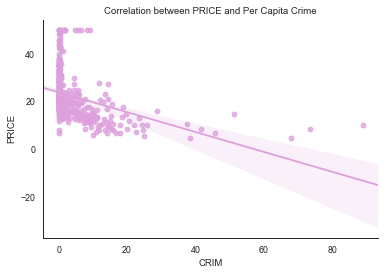

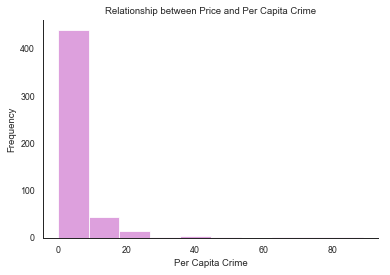

In [17]:
# Relationship between Per Capita Crime and PRICE
sns.regplot(x= 'CRIM', y= 'PRICE', data= boston_df, fit_reg= True, color= 'plum')
plt.title('Correlation between PRICE and Per Capita Crime' )
sns.despine()
plt.show()

RemoveTR_Axis()
plt.hist(boston_df.CRIM, color= 'plum')
plt.xlabel('Per Capita Crime')
plt.ylabel('Frequency')
plt.title('Relationship between Price and Per Capita Crime')
plt.show()

#### <span style="color: plum">As we can see a strong negative correlation between 'Per Capita Crime' and 'Price'. as Crime increase the price decrease.</span>

#### Step II: Checking for Normality with Histograms

#### we must check for normality among variables. if they skewed in any way we need to transform them by taking log in order to normalize them.

we saw that the scatter plot between 'Per Capita Crime' and 'Price' observed an exponential decay in crime. this can be overcome by normalising.

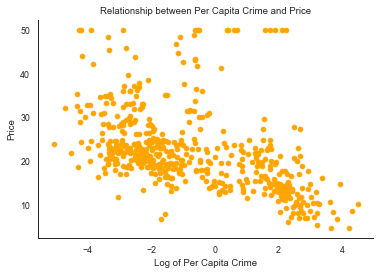

In [18]:
log_CRIM = np.log(boston_df.CRIM)

RemoveTR_Axis()
plt.scatter(log_CRIM, boston_df.PRICE, c= 'orange')
plt.xlabel('Log of Per Capita Crime')
plt.ylabel('Price')
plt.title('Relationship between Per Capita Crime and Price')
plt.show()

#### Plot a Histogram for Per Capita Crime (Normalized)

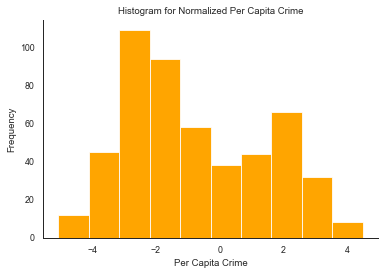

In [19]:
plt.hist(log_CRIM, color= 'orange')

RemoveTR_Axis()
plt.xlabel('Per Capita Crime')
plt.ylabel('Frequency')
plt.title('Histogram for Normalized Per Capita Crime')
plt.show()

#### Let's see the Scatter Plot and Histogram for normalized 'Rooms per Dwelling'

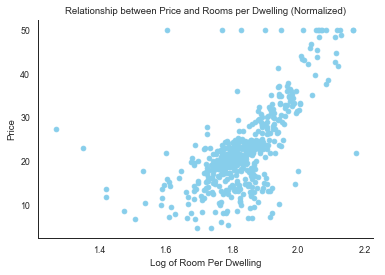

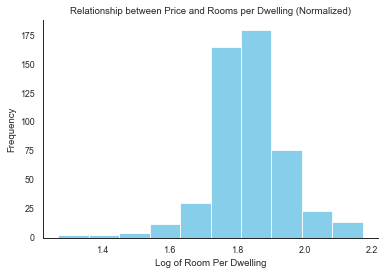

In [20]:
log_RM = np.log(boston_df.RM)
RemoveTR_Axis()
plt.scatter(log_RM, boston_df.PRICE, c= 'skyblue')
plt.xlabel('Log of Room Per Dwelling')
plt.ylabel('Price')
plt.title('Relationship between Price and Rooms per Dwelling (Normalized)')
plt.show()

RemoveTR_Axis()
plt.hist(log_RM, color= 'skyblue')
plt.xlabel('Log of Room Per Dwelling')
plt.ylabel('Frequency')
plt.title('Relationship between Price and Rooms per Dwelling (Normalized)')
plt.show()

### Correlation Matrix between Crime Rate and Other features

In [21]:
bos_df = boston_df
bos_df['CRIM'] = np.log(bos_df['CRIM'])
df = bos_df.iloc[:, [0, 4, 5, 7, 10, 12]]
df.corr()

,CRIM,NOX,RM,DIS,PTRATIO,LSTAT
CRIM,1.000000,0.788616,-0.306943,-0.681903,0.389554,0.626615
NOX,0.788616,1.000000,-0.302188,-0.769230,0.188933,0.590879
RM,-0.306943,-0.302188,1.000000,0.205246,-0.355501,-0.613808
DIS,-0.681903,-0.769230,0.205246,1.000000,-0.232471,-0.496996
PTRATIO,0.389554,0.188933,-0.355501,-0.232471,1.000000,0.374044
LSTAT,0.626615,0.590879,-0.613808,-0.496996,0.374044,1.000000


### Linear Regression

here, we are trying to fit linear regression model in boston housing dataset and predict the price for same.

we will, use Least Square Method (LSM) to estimate the coefficients. it takes the following linear equation

#### Y = mX + c

Where,
Y : Boston Housing Price ( also known as "Target" data or Dependent Variable in Python)
X : Other Features ( also known as Independent Variables)

m : Co-efficient of X
c : Intercept variable (Co-efficient)

###### here we use two ways of fitting linear regression. 
###### 1. Using StatsModels
###### 2. Using Sci-kit Learn

### Fitting Linear Regression using StatsModels

In [22]:
# importing regression modules
# Ordinary Least Square (OLS) => a method for estimating unknown parameters in Linear Regression Model

import statsmodels.api as smapi
from statsmodels.formula.api import ols

model = ols('PRICE ~ PTRATIO + NOX + RM + LSTAT + DIS', bos_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Thu, 04 Jul 2019   Prob (F-statistic):          3.67e-131
Time:                        18:22:54   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.000      28.436      46.562
PTRATIO       -1.0458      0.114     -9.212      0.000      -1.269      -0.823
NOX          -17.9966      3.261     -5.519      0.000     -24.403     -11.590
RM             4.1633      0.412     10.104      0.000       3.354       4.973
LSTAT         -0.5811      0.048    -12.122      0.000      -0.675      -0.487
DIS           -1.1847      0.168     -7.034      0.000      -1.516      -0.854
==============================================================================
Omnibus:                      187.456   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              885.498
Skew:                           1.584   Prob(JB):                    5.21e-193
Kurtosis:                       8.654   Cond. No.                         545.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting the Co-efficients

###### As we can see, above out put will enough iformation for describing the result.

we now only concentrate on <span style="color: green;"> <b><i>Co-efficient Table</i> as shown in middle (above) </b></span>. following is the interpretation:

<b>1. </b>On Interpreting the <u>p</u> <span style="color: blue"><b>(p > |t|)</b></span> value, which is very small (basically zero). which means our features are statistically significant predictor <b>Price</b> of <b>Boston Housing</b>.

<b>2. </b>Again In general each <span style="color: blue"><b>coef</b></span> can be interpreted as an <span style="color: blue"><b>increase/decrease</b></span> with a unit <span style="color: blue"><b>increase</b></span> in the corresponding <span style="color: blue"><b>feature</b></span>.For instance if we compare two groups of towns, one where the average number of rooms is say <span style="color: green"><b>5</b></span> <b>and the other group is the same except that they all have </b><span style="color: green"><b>6</b></span> rooms. For these two groups the average difference in house prices is about <b><span style="color: red">9.1</span> (in thousands)</b> so about <span style="color: red"><b>$9,100</b></span> difference which is nothing but <span style="color: blue"><b>coef</b></span> of <span style="color: blue"><b>RM</b></span>. The confidence interval finds us a range of plausible values for this difference, about <b>(8,279,9,925)</b>.

<b>3. </b>Another signicant feature indicated by <span style="color: blue"><b>NOX</b></span> which says on average each unit increase in NOX concentration in area will ultimately decrease the housing price by <span style="color: red"><b>$18,000</b></span> net of the other variables. The confidence interval finds us a range of plausible values for this difference,about <b>(11,000,24,000)</b>.

<b>4. </b>Another signicant feature indicated by <span style="color: blue"><b>DIS</b></span> which says on average each unit increase in DIS(weighted distances to five Boston employment centres) will ultimately decrease the housing price by <span style="color: red"><b>$1,000</b></span> net of the other variables. The confidence interval finds us a range of plausible values for this difference,about <b>(854,1,500)</b>.

### Interpreting Confidence Intervals for the model coefficients

#### 1. Statsmodels calculate 95% confidence intervals for our model coefficients,which can be interpreted as :-
<ul><li>If population from which this sample has been taken is sampled <b>100</b> times then approximately <b>95%</b> of those confidence interval whould contain true coefficients.</li></ul>

#### 2. Although 95% is just a convention
<ul><li>You can create 90% confidence intervals(which will be more narrow).</li><li>You can create 99% confidence intervals(which will be more wide).</li></ul>

#### 3. The range above given is the probable range within which the coefficient lies.

### Interpreting the R-Squared

Also known as the <b>coefficient of determination</b> or just <b>R-squared</b>. A statistical measure that <u><i>tells</i></u> <b>how well a regression line approximates the real data points</b>.A method of evaluating the overall fit of a linear model.

<ul><li>In the given model the R-squared value is <span style="color: blue"><b>0.708</b></span> which basically means that approximately <span style="color: blue"><b>70%</b></span> of the total variance in the price can be determined by the current regression model.</li></ul>


### So, now we have Linear Regression equation, which can predict Housing Price based on following features:

#### 1. CRIM => Per Capita Crime Rate
#### 2. RM => Rooms Per Dwelling
#### 3. PTRATIO => Pupil Teacher's Ratio
#### 4. LSTAT => Lower Status of Population in Area, and
#### 5. DIS => Distannce to 5 Boston employment centres

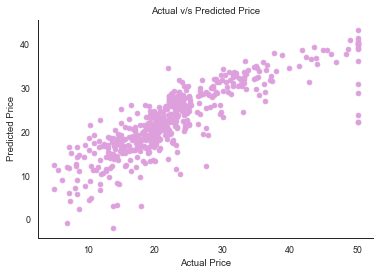

In [23]:
predicted_price = model.fittedvalues

RemoveTR_Axis()
plt.scatter(bos_df.PRICE, predicted_price, c= 'plum')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual v/s Predicted Price')
plt.show()

### Fitting Linear Regression using Sci-kit Learn

In [24]:
# Evaluate Test and Train sets
from sklearn.model_selection import train_test_split
X = bos_df.drop('PRICE', axis= 1)
Y = bos_df.PRICE

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

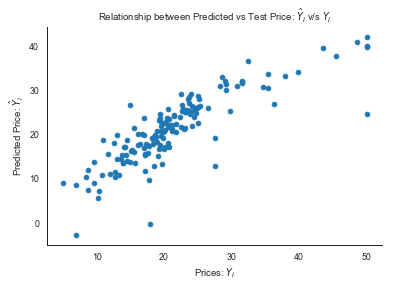

In [26]:
from sklearn.linear_model import LinearRegression

_lr = LinearRegression()
_lr.fit(X_train, Y_train)

Y_Pred = _lr.predict(X_test)

RemoveTR_Axis()
plt.scatter(Y_test, Y_Pred)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted Price: $\hat{Y}_i$')
plt.title('Relationship between Predicted vs Test Price: $\hat{Y}_i$ v/s $Y_i$')
plt.show()

#### Displaying the Co-efficient of Features

In [27]:
_lr.coef_

array([ 4.53544811e-01,  3.57221998e-02,  3.71920725e-02,  3.42058024e+00, -1.54739874e+01,  4.10877500e+00, -1.56449638e-02, -1.26752917e+00,  9.84459887e-02, -8.43513669e-03, -8.51635980e-01,  1.28555581e-02, -5.75494387e-01])

#### displaying the R-Square Score

In [28]:
_lr.score(X_test, Y_test)

0.7155025703741035

#### Generating the Mean Square Error

In [29]:
_mse = sklearn.metrics.mean_squared_error(Y_test, Y_Pred)
_mse

21.19878416252695

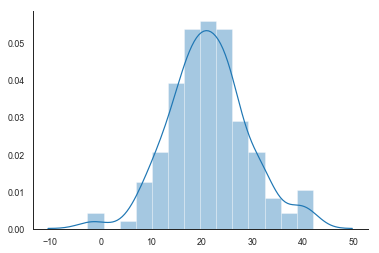

In [30]:
sns.distplot(Y_Pred)
sns.despine()

#### Let's evaluate Mean Absolute Error (MAE). MAE is actually an average of all "Predicted Errors Values". all predicted error values are forced to be positive.

In [31]:
sklearn.metrics.mean_absolute_error(Y_test, Y_Pred)

3.1287359237732217

#### Root Mean Square Error (RMSE). actually a root square of an average of predicted square error values.

In [32]:
np.sqrt(_mse)

4.604213739882951

### Calculate Regression with Five Features only, these are :- NOX, RM, DIS, PTRATIO, LSTAT.

In [33]:
from sklearn.model_selection import train_test_split
X1 = bos_df[['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
Y1 = bos_df[['PRICE']]

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size= 0.3, random_state= 42)

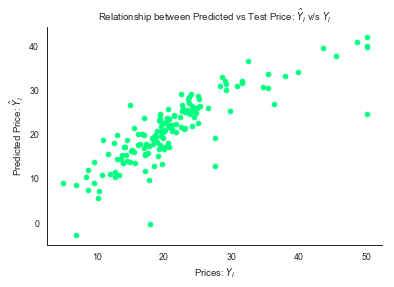

In [34]:
from sklearn.linear_model import LinearRegression
_lr1 = LinearRegression()

_lr1.fit(X1_train, Y1_train)

Y1_Pred = _lr1.predict(X1_test)

RemoveTR_Axis()
plt.scatter(Y_test, Y_Pred, c= 'springgreen')
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted Price: $\hat{Y}_i$')
plt.title('Relationship between Predicted vs Test Price: $\hat{Y}_i$ v/s $Y_i$')
plt.show()

In [35]:
_lr1.score(X1_test, Y1_test)

0.6952643630725592

### R2 Square Value

In [36]:
_res = sklearn.model_selection.cross_val_score(_lr1, X1_train, Y1_train, cv= 5,  scoring= 'r2')
print("%s: %f (%f)" % ('r2 score', _res.mean(), _res.std()))

r2 score: 0.670699 (0.087439)


### Random Forest Regression

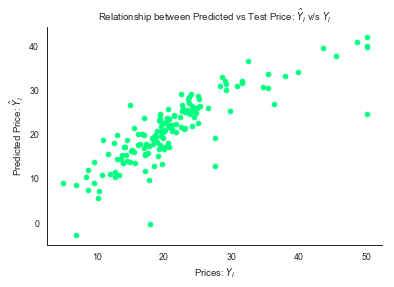

In [37]:
from sklearn.ensemble import RandomForestRegressor

_rfr = RandomForestRegressor(n_estimators= 500, oob_score= True, random_state= 42)

_rfr.fit(X1_train, Y1_train)

Y1_Pred = _rfr.predict(X1_test)

RemoveTR_Axis()
plt.scatter(Y_test, Y_Pred, c= 'springgreen')
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted Price: $\hat{Y}_i$')
plt.title('Relationship between Predicted vs Test Price: $\hat{Y}_i$ v/s $Y_i$')
plt.show()

#### Let's evaluate Mean Absolute Error (MAE).

In [38]:
sklearn.metrics.mean_absolute_error(Y1_test, Y1_Pred)

2.1283907894736833

#### Root Mean Square Error (RMSE)

In [39]:
_mse1 = sklearn.metrics.mean_squared_error(Y1_test, Y1_Pred)
np.sqrt(_mse1)

3.175911046787243

In [40]:
_rfr.score(X1_test, Y1_test)

0.864635727448493

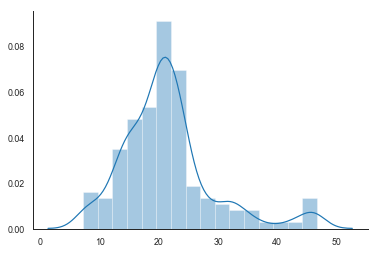

In [41]:
sns.distplot(Y1_Pred)
sns.despine()

### R2 Square Value

In [42]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

_score = r2_score(Y1_test, Y1_Pred)
_spearman = spearmanr(Y1_test, Y1_Pred)
# _pearson = pearsonr(Y1_test, Y1_Pred)

print ('Out Of Bag R2 Score: ', _rfr.oob_score_)
print ('Test Data R2 Score: ', _score)
print ('Test Data Spearman Correlation: ', round(_spearman[0], 3))
# print ('Test Data Pearson Correlation: ', round(_pearson[0], 3))

Out Of Bag R2 Score:  0.8321457039617636
Test Data R2 Score:  0.864635727448493
Test Data Spearman Correlation:  0.897
